In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, classification_report,precision_score,recall_score,f1_score,confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

## Task 1 - Data Exploration

In [152]:
# Load the dataset
dataset = pd.read_csv("customer_churn.csv")

# Display summary statistics
print("Summary Statistics:\n")
dataset.describe(include="all")

Summary Statistics:



,CustomerID,Age,Subscription_Length_Months,Watch_Time_Hours,Number_of_Logins,Preferred_Content_Type,Membership_Type,Payment_Method,Payment_Issues,Number_of_Complaints,Resolution_Time_Days,Churn
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000
unique,NaN,NaN,NaN,NaN,NaN,4,3,3,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Sports,Premium,Bank Transfer,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,258,345,337,NaN,NaN,NaN,NaN
mean,500.500000,43.81900,18.218000,100.794546,50.387000,NaN,NaN,NaN,0.154000,4.546000,15.268000,0.265000
std,288.819436,14.99103,10.177822,56.477606,28.224171,NaN,NaN,NaN,0.361129,2.919316,8.225317,0.441554
min,1.000000,18.00000,1.000000,5.036738,1.000000,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.000000
25%,250.750000,31.00000,9.000000,50.383080,26.000000,NaN,NaN,NaN,0.000000,2.000000,9.000000,0.000000
50%,500.500000,44.00000,18.000000,100.234954,51.000000,NaN,NaN,NaN,0.000000,5.000000,15.000000,0.000000
75%,750.250000,56.00000,27.000000,150.445885,75.000000,NaN,NaN,NaN,0.000000,7.000000,22.000000,1.000000


In [153]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  1000 non-null   int64  
 1   Age                         1000 non-null   int64  
 2   Subscription_Length_Months  1000 non-null   int64  
 3   Watch_Time_Hours            1000 non-null   float64
 4   Number_of_Logins            1000 non-null   int64  
 5   Preferred_Content_Type      1000 non-null   object 
 6   Membership_Type             1000 non-null   object 
 7   Payment_Method              1000 non-null   object 
 8   Payment_Issues              1000 non-null   int64  
 9   Number_of_Complaints        1000 non-null   int64  
 10  Resolution_Time_Days        1000 non-null   int64  
 11  Churn                       1000 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 93.9+ KB


In [154]:
# Identify missing values
dataset.isnull().all()


CustomerID                    False
Age                           False
Subscription_Length_Months    False
Watch_Time_Hours              False
Number_of_Logins              False
Preferred_Content_Type        False
Membership_Type               False
Payment_Method                False
Payment_Issues                False
Number_of_Complaints          False
Resolution_Time_Days          False
Churn                         False
dtype: bool

### Data distributions visualizations

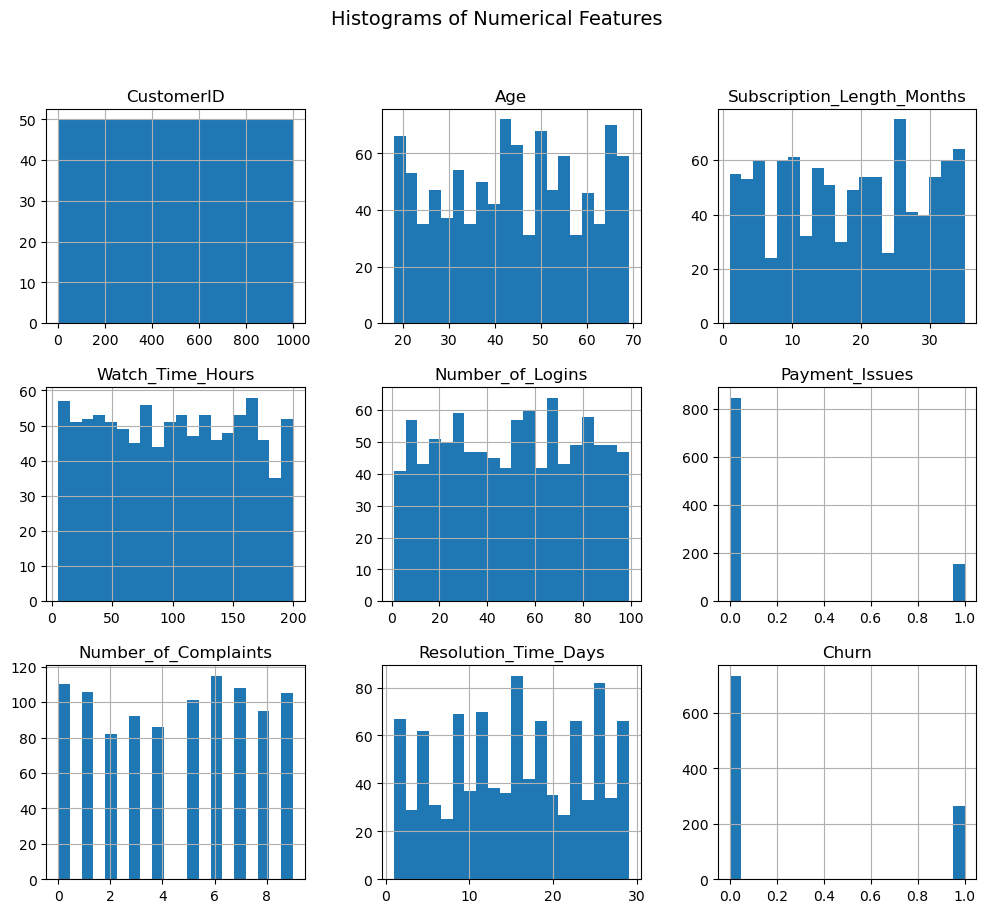

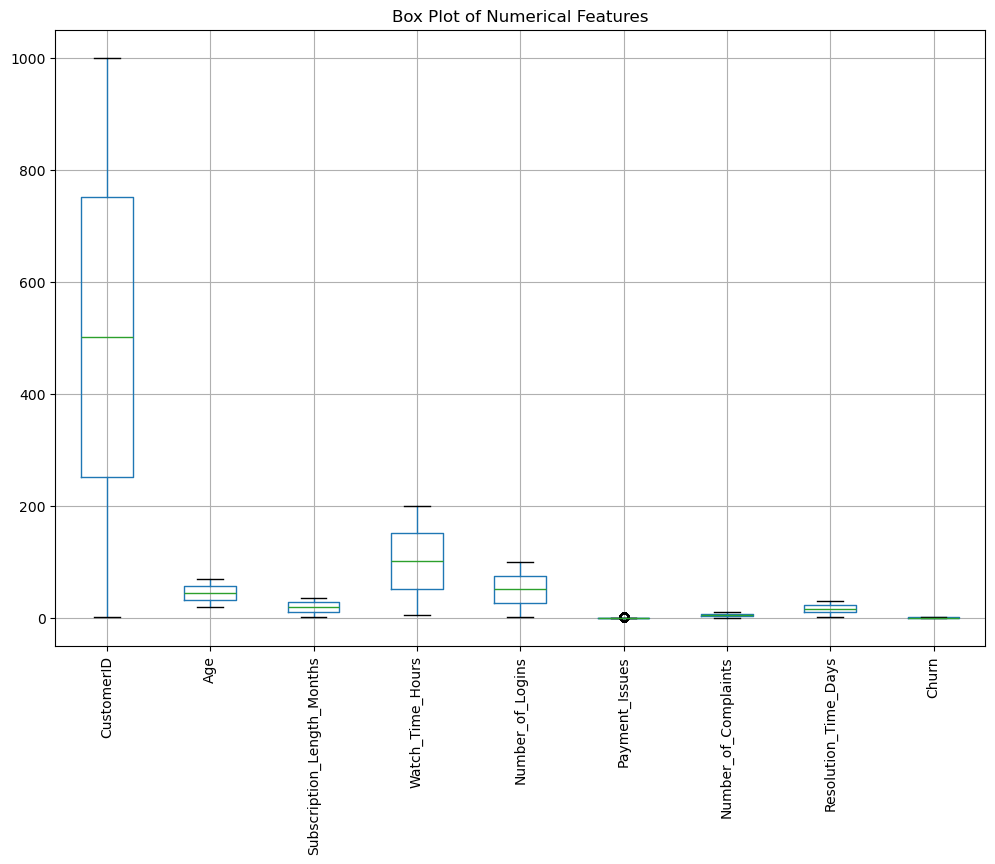

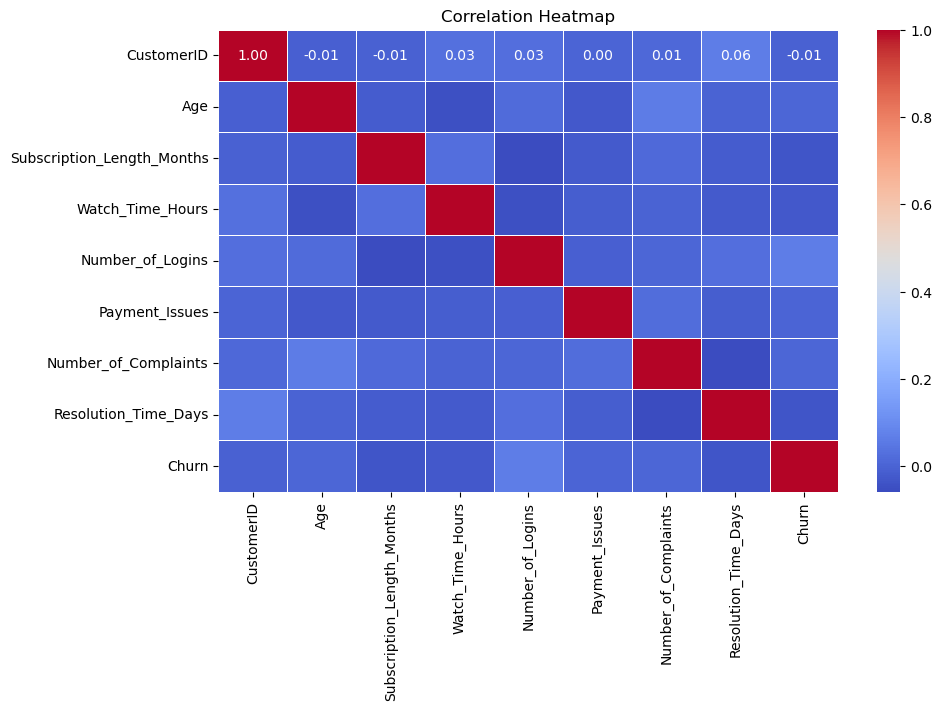

In [155]:
# Visualizing distributions with histograms
dataset.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms of Numerical Features", fontsize=14)
plt.show()

# Box plots for outlier detection
plt.figure(figsize=(12, 8))
dataset.boxplot(rot=90)
plt.title("Box Plot of Numerical Features")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
numeric_cols = dataset.select_dtypes(include=[np.number]).columns
sns.heatmap(dataset[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


### Data Preparation

In [156]:
# Selecting features and target
X = dataset.drop(columns=["Churn", "CustomerID"])  # Drop non-relevant columns
y = dataset["Churn"]

# Convert categorical variables to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=False)


In [157]:
print(y.value_counts())

Churn
0    735
1    265
Name: count, dtype: int64


In [158]:
X

,Age,Subscription_Length_Months,Watch_Time_Hours,Number_of_Logins,Payment_Issues,Number_of_Complaints,Resolution_Time_Days,Preferred_Content_Type_Documentaries,Preferred_Content_Type_Movies,Preferred_Content_Type_Sports,Preferred_Content_Type_TV Shows,Membership_Type_Basic,Membership_Type_Premium,Membership_Type_Standard,Payment_Method_Bank Transfer,Payment_Method_Credit Card,Payment_Method_PayPal
0,56,35,62.579266,73,0,7,8,False,False,False,True,True,False,False,False,False,True
1,69,15,159.714415,1,0,7,21,False,False,True,False,True,False,False,False,True,False
2,46,25,41.119547,36,0,5,13,False,True,False,False,False,True,False,False,False,True
3,32,28,183.961735,35,0,0,27,False,True,False,False,False,False,True,False,True,False
4,60,10,87.782848,66,0,7,18,False,True,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,60,31,128.416734,68,0,9,4,False,True,False,False,False,True,False,False,True,False
996,64,10,18.460760,12,0,2,11,False,True,False,False,False,True,False,False,True,False
997,62,13,6.104834,60,0,0,5,True,False,False,False,False,True,False,False,True,False
998,35,31,187.732751,27,1,8,2,False,False,False,True,True,False,False,True,False,False


### Perform Over Sampling to imbalanced dataset

In [159]:
!pip install imbalanced-learn


In [160]:
from imblearn.over_sampling import RandomOverSampler

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Apply oversampling
X_resampled, y_resampled = ros.fit_resample(X, y)

# Check the new class distribution
print(y_resampled.value_counts())

Churn
0    735
1    735
Name: count, dtype: int64


### Split dataset into training and test set

In [161]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled.values, y_resampled.values, test_size=0.2, random_state=42)


# Task 2 - Build Decision Tree Model

In [162]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

### Preform hyperparameter tuning - grid search

In [163]:
# Define the parameter grid
param_grid = {
    'max_depth': [ 1,2,7, 10,15,25,50,80,120,200, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4,6]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best parameters
best_dt_classifier = grid_search.best_estimator_

Best Hyperparameters: {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2}


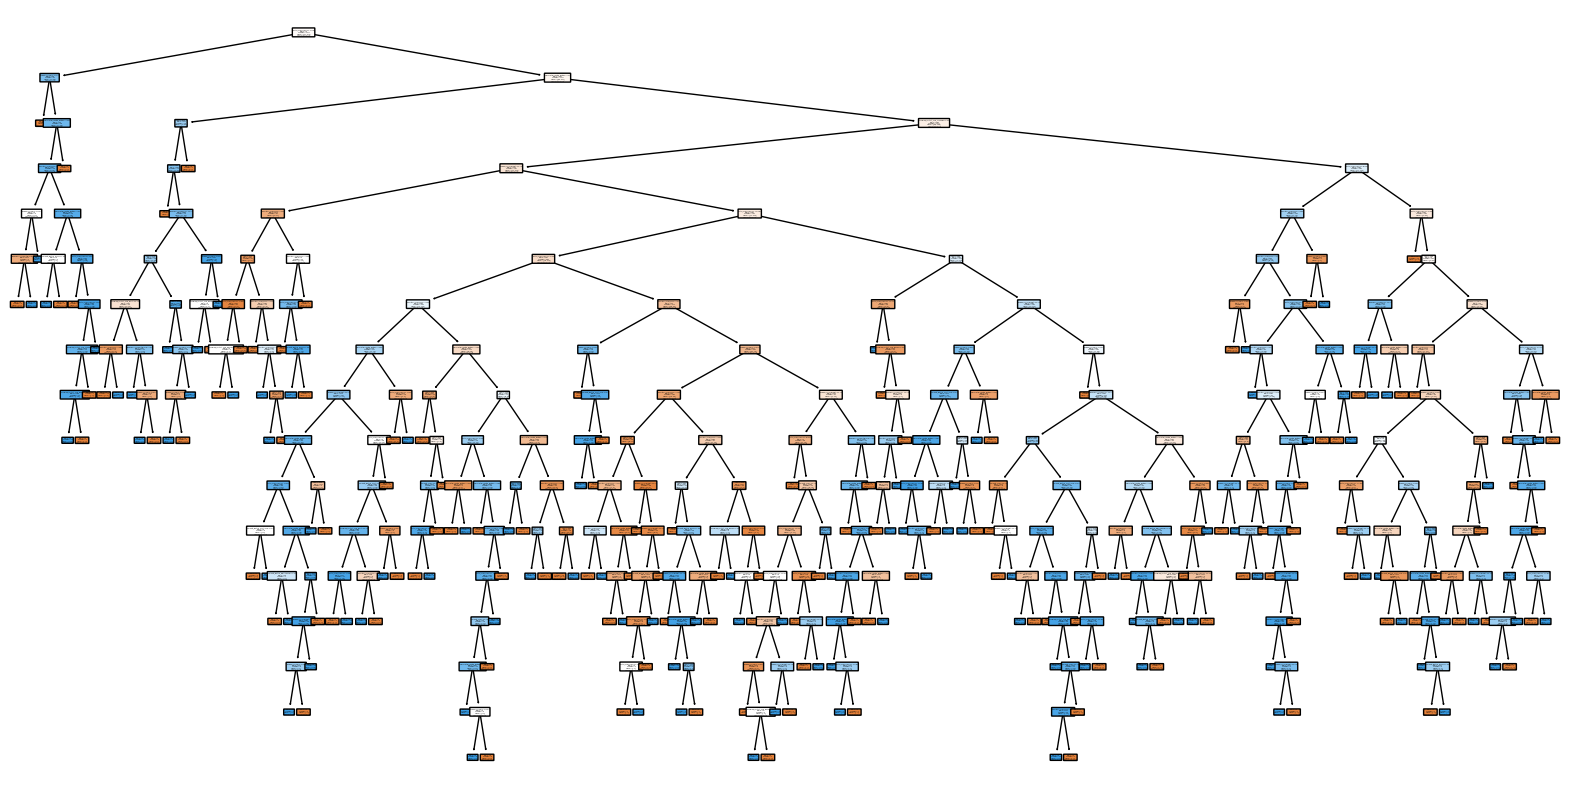

In [164]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt_classifier, filled=True, feature_names=X.columns, class_names=['Not Churn', 'Churn'], rounded=True)
plt.show()


### Decision Tree Metrics

Accuracy: 0.7891156462585034
Precision: 0.7554347826086957
Recall: 0.8910256410256411
F1 Score: 0.8176470588235295


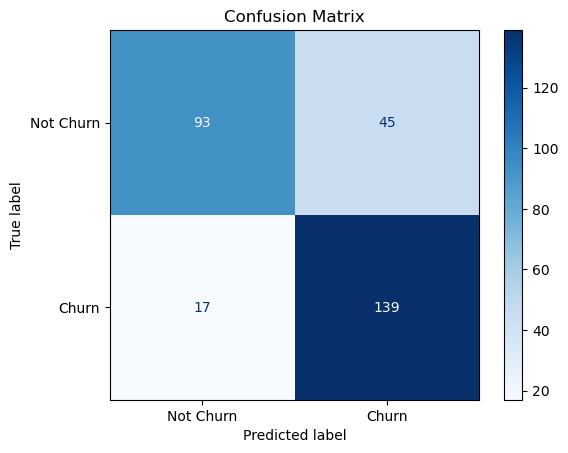

In [165]:
# Make predictions on the test set
y_pred = best_dt_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Not Churn', 'Churn'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Task 3 - Random Forest

In [166]:
# Perform feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [167]:
# Train Random Forest
rf_model = RandomForestClassifier(criterion='entropy', random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

### Random Forest Metrics:

Accuracy: 0.8707482993197279
Precision: 0.9154929577464789
Recall: 0.8333333333333334
F1 Score: 0.87248322147651


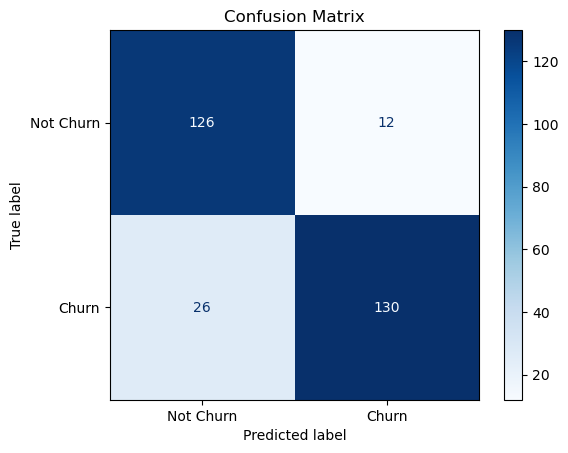

In [168]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, rf_pred)
precision = precision_score(y_test, rf_pred)
recall = recall_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Not Churn', 'Churn'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()